# Binary Tree Maximum Path Sum
A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

The path sum of a path is the sum of the node's values in the path.

Given the `root` of a binary tree, return the maximum path sum of any non-empty path.

# Examples
**Example 1:**

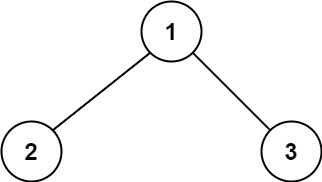
```
Input: root = [1,2,3]
Output: 6
```
Explanation: The optimal path is 2 -> 1 -> 3 with a path sum of 2 + 1 + 3 = 6.

**Example 2:**

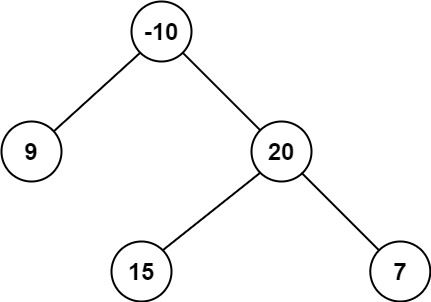
```
Input: root = [-10,9,20,null,null,15,7]
Output: 42
```
Explanation: The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.

**Example 3:**

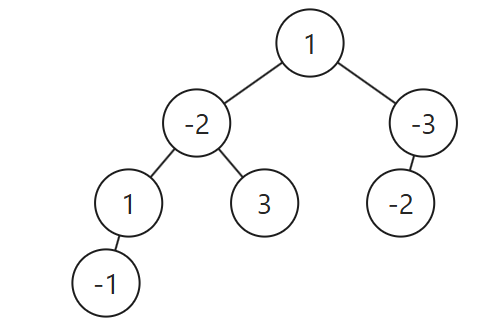
```
Input: root = [1,-2,-3,1,3,-2,null,-1]
Output: 3


In the following function `helper`, the first element of the return value represents the maximum value of `path_sum` among all the paths in the tree rooted at `node` that pass through `node` but exclude any "corner" subgraph shapes illustrated in the figure below:

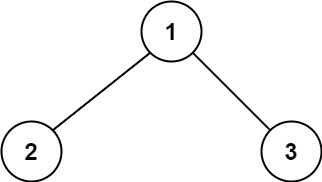

while the second element of the return value represents the maximum value of `path_sum` among the paths in the tree rooted at `node` that include some "corner" subgraph shapes or do not pass through `node`.

In [ ]:
from typing import Optional

# Definition for a binary tree node.


class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def maxPathSum(self, root: Optional[TreeNode]) -> int:
        def helper(node):
            if node == None:
                return 0, 0
            if node.left == None and node.right == None:
                return node.val, - float('inf')

            left_result = helper(node.left)
            right_result = helper(node.right)
            val = node.val

            if not node.left:
                return max(val, val + right_result[0]), max(right_result[0], right_result[1])
            if not node.right:
                return max(val, val + left_result[0]), max(left_result[0], left_result[1])

            return max(val, val + left_result[0], val + right_result[0]), max(left_result[0], right_result[0], left_result[1], right_result[1], left_result[0] + val + right_result[0])

        result = helper(root)

        return max(result[0], result[1])